In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
%cd 

- Title : Bitcoin Historical Dataset,
- Year : 8-April-2014 to 8-April-2023,
- Data source : https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD

**About each column**
- Open: The opening price of bitcoin at the start of a particular time period (e.g., day, week, month). This column tells you the price level at which the market opened for trading at the start of the time period in question.

- High: The highest price of bitcoin during the time period. This column tells you the highest price level reached by bitcoin during the time period.

- Low: The lowest price of bitcoin during the time period. This column tells you the lowest price level reached by bitcoin during the time period.

- Close: The closing price of bitcoin at the end of the time period. This column tells you the price level at which the market closed for trading at the end of the time period in question.

- Adj Close: The adjusted closing price of bitcoin at the end of the time period. This column takes into account any corporate actions, such as stock splits or dividends, that may have affected the price. It is a more accurate representation of the true closing price of the security.

- Volume: The total volume of bitcoin traded during the time period. This column tells you how much bitcoin was bought and sold during the time period.

The **Close** Value would be our target variable

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('BTC-USD.csv', header=0,index_col=0,parse_dates=["Date"])
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-04-04,27795.273438,28433.742188,27681.304688,28168.089844,28168.089844,15284538859
2023-04-05,28169.726563,28739.238281,27843.763672,28177.984375,28177.984375,17052315986
2023-04-06,28175.226563,28178.384766,27738.759766,28044.140625,28044.140625,13837809380


In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# EDA

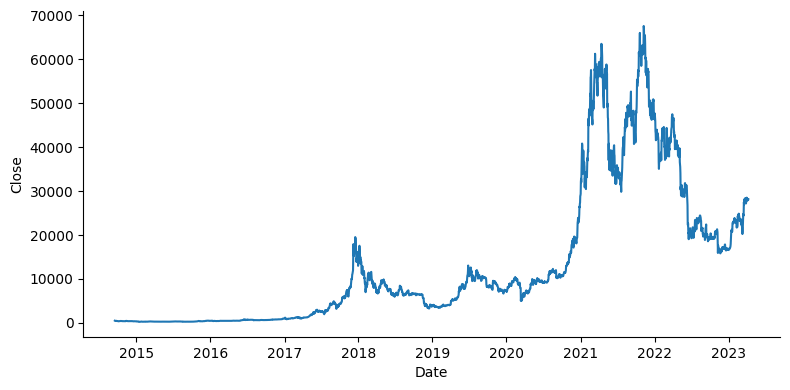

In [ ]:
sns.relplot(
    data=df,
    x="Date", y="Close",
    kind="line",
    height=4, aspect=2
)

# Feature Extraction

In [ ]:
df.rename(columns={"Adj Close":"Adj_Close"},inplace=True)
df.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
df["dates_features"] = df.index
df

,Open,High,Low,Close,Adj_Close,Volume,dates_features
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014-09-17
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014-09-18
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014-09-19
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014-09-20
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014-09-21
...,...,...,...,...,...,...,...
2023-04-04,27795.273438,28433.742188,27681.304688,28168.089844,28168.089844,15284538859,2023-04-04
2023-04-05,28169.726563,28739.238281,27843.763672,28177.984375,28177.984375,17052315986,2023-04-05
2023-04-06,28175.226563,28178.384766,27738.759766,28044.140625,28044.140625,13837809380,2023-04-06


1. Convert time to learnable features  
2. Extract a New feature : **RSI** 

**The Relative Strength Index (RSI)** is a momentum oscillator that measures the magnitude of recent price changes to evaluate overbought or oversold 
conditions in the market. It's calculated based on the closing prices of a 
security over a specified time period, typically 14 periods. 


In [ ]:
def split_data(df):
  train_size = int(len(df)*0.75)
  test_size = int(len(df)*0.15)
  train_df,test_df = df[:train_size], df[train_size:train_size+test_size]
  valid_df = df[train_size+test_size:]
  return train_df,test_df,valid_df
training_data, testing_data, validation_data = split_data(df)

In [ ]:
from tqdm.notebook import tqdm
def time_extraction(df):
  rows=[]
  for id,row in tqdm(df.iterrows(), total=df.shape[0]): 
    row_data = dict(
        day_of_month = row.dates_features.day,
        day_of_week = row.dates_features.dayofweek,
        week_of_year = row.dates_features.week,
        month = row.dates_features.month,
        open = row.Open,
        high = row.High,
        low = row.Low,
        adj_close = row.Adj_Close,
        close = row.Close
    )
    rows.append(row_data)
  return pd.DataFrame(rows)

def RSI_extraction(df): 
  delta = df['close'].diff()
  delta.iloc[0] = 0  # Set the first value to zero since it's NaN

  # Calculate the gains and losses over a 14-day period
  gain = delta.where(delta > 0, 0)
  loss = -delta.where(delta < 0, 0)

  # Calculate the average gain and average loss over the 14-day period
  avg_gain = gain.rolling(window=14).mean()
  avg_loss = loss.rolling(window=14).mean()
  # Calculate the RS and RSI
  rs = avg_gain / avg_loss # if loss is zero -> rs = infinity 
  rsi = 100 - (100 / (1 + rs)) # scale to 100 instead of infinity 
  df.insert(len(df.columns)-1,"RSI",rsi)
  return df

In [ ]:
df = time_extraction(df)
df.head()

  0%|          | 0/3126 [00:00<?, ?it/s]

,day_of_month,day_of_week,week_of_year,month,open,high,low,adj_close,close
0,17,2,38,9,465.864014,468.174011,452.421997,457.334015,457.334015
1,18,3,38,9,456.859985,456.859985,413.104004,424.440002,424.440002
2,19,4,38,9,424.102997,427.834991,384.532013,394.795990,394.795990
3,20,5,38,9,394.673004,423.295990,389.882996,408.903992,408.903992
4,21,6,38,9,408.084991,412.425995,393.181000,398.821014,398.821014


In [ ]:
df = RSI_extraction(df)
df

,day_of_month,day_of_week,week_of_year,month,open,high,low,adj_close,RSI,close
0,17,2,38,9,465.864014,468.174011,452.421997,457.334015,NaN,457.334015
1,18,3,38,9,456.859985,456.859985,413.104004,424.440002,NaN,424.440002
2,19,4,38,9,424.102997,427.834991,384.532013,394.795990,NaN,394.795990
3,20,5,38,9,394.673004,423.295990,389.882996,408.903992,NaN,408.903992
4,21,6,38,9,408.084991,412.425995,393.181000,398.821014,NaN,398.821014
...,...,...,...,...,...,...,...,...,...,...
3121,4,1,14,4,27795.273438,28433.742188,27681.304688,28168.089844,49.945783,28168.089844
3122,5,2,14,4,28169.726563,28739.238281,27843.763672,28177.984375,56.945384,28177.984375
3123,6,3,14,4,28175.226563,28178.384766,27738.759766,28044.140625,47.303586,28044.140625
3124,7,4,14,4,28038.966797,28111.593750,27794.031250,27925.859375,54.649344,27925.859375


In [ ]:
df['RSI']=df['RSI'].interpolate(method= "polynomial",order=5)
# first 13 values are still NaN and cannot be interpolated, we'll use backward filling 
df['RSI'] = df['RSI'].fillna(method='bfill')
df

,day_of_month,day_of_week,week_of_year,month,open,high,low,adj_close,RSI,close
0,17,2,38,9,465.864014,468.174011,452.421997,457.334015,31.997433,457.334015
1,18,3,38,9,456.859985,456.859985,413.104004,424.440002,31.997433,424.440002
2,19,4,38,9,424.102997,427.834991,384.532013,394.795990,31.997433,394.795990
3,20,5,38,9,394.673004,423.295990,389.882996,408.903992,31.997433,408.903992
4,21,6,38,9,408.084991,412.425995,393.181000,398.821014,31.997433,398.821014
...,...,...,...,...,...,...,...,...,...,...
3121,4,1,14,4,27795.273438,28433.742188,27681.304688,28168.089844,49.945783,28168.089844
3122,5,2,14,4,28169.726563,28739.238281,27843.763672,28177.984375,56.945384,28177.984375
3123,6,3,14,4,28175.226563,28178.384766,27738.759766,28044.140625,47.303586,28044.140625
3124,7,4,14,4,28038.966797,28111.593750,27794.031250,27925.859375,54.649344,27925.859375


In [ ]:
df.isnull().sum()

day_of_month    0
day_of_week     0
week_of_year    0
month           0
open            0
high            0
low             0
adj_close       0
RSI             0
close           0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
def scale_data(df):
  
  return pd.DataFrame(
      Scaler.fit_transform(df),
      index=df.index,
      columns = df.columns
  )
scaled_data = scale_data(df)
scaled_data.head()

,day_of_month,day_of_week,week_of_year,month,open,high,low,adj_close,RSI,close
0,0.533333,0.333333,0.711538,0.727273,0.004289,0.003739,0.004243,0.004144,0.287147,0.004144
1,0.566667,0.500000,0.711538,0.727273,0.004155,0.003574,0.003649,0.003655,0.287147,0.003655
2,0.600000,0.666667,0.711538,0.727273,0.003669,0.003151,0.003217,0.003216,0.287147,0.003216
3,0.633333,0.833333,0.711538,0.727273,0.003232,0.003085,0.003298,0.003425,0.287147,0.003425
4,0.666667,1.000000,0.711538,0.727273,0.003431,0.002927,0.003348,0.003275,0.287147,0.003275


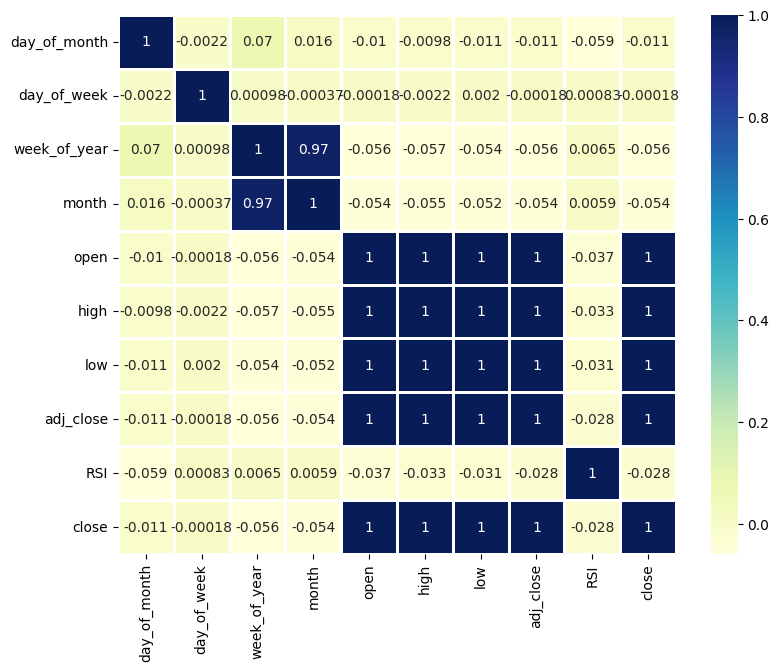

In [ ]:
def heatmap(df):
  f, ax = plt.subplots(figsize=(9, 7))
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, linewidths=1, ax=ax)
  ax.set_xlabel('')
  ax.set_ylabel('')
  plt.show()
heatmap(scaled_data)

## Data leakage: 
- The(open, high, low) features are highly correlated with the target variable, this is a sign of **Data leakage**.

- Data leakage is a situation where information that should not be available to the model during training is inadvertently included in the training data

- In our case, these correlated features are directly or indirectly derived from the target variable. Using them during training results in overfitting

- Instead of dropping the values we'll consider using dimensionality reduction with PCA to combine the information contained in these features into a smaller set of new features that capture the most important information.

In [ ]:
scaled_data

,day_of_month,day_of_week,week_of_year,month,open,high,low,adj_close,RSI,close
0,0.533333,0.333333,0.711538,0.727273,0.004289,0.003739,0.004243,0.004144,0.287147,0.004144
1,0.566667,0.500000,0.711538,0.727273,0.004155,0.003574,0.003649,0.003655,0.287147,0.003655
2,0.600000,0.666667,0.711538,0.727273,0.003669,0.003151,0.003217,0.003216,0.287147,0.003216
3,0.633333,0.833333,0.711538,0.727273,0.003232,0.003085,0.003298,0.003425,0.287147,0.003425
4,0.666667,1.000000,0.711538,0.727273,0.003431,0.002927,0.003348,0.003275,0.287147,0.003275
...,...,...,...,...,...,...,...,...,...,...
3121,0.100000,0.166667,0.250000,0.272727,0.409933,0.411532,0.415490,0.415351,0.475945,0.415351
3122,0.133333,0.333333,0.250000,0.272727,0.415491,0.415987,0.417943,0.415498,0.549574,0.415498
3123,0.166667,0.500000,0.250000,0.272727,0.415573,0.407809,0.416357,0.413512,0.448152,0.413512
3124,0.200000,0.666667,0.250000,0.272727,0.413550,0.406835,0.417192,0.411757,0.525422,0.411757


# PCA 

In [ ]:
from sklearn.decomposition import PCA
def estimate_n_component(df):
  plt.figure(figsize=(6,3))
  X = df.drop('close',axis=1)
  pca = PCA().fit(X)
  plt.plot(np.cumsum(pca.explained_variance_ratio_))
  plt.xlabel('number of components')
  plt.ylabel('cumulative explained variance')

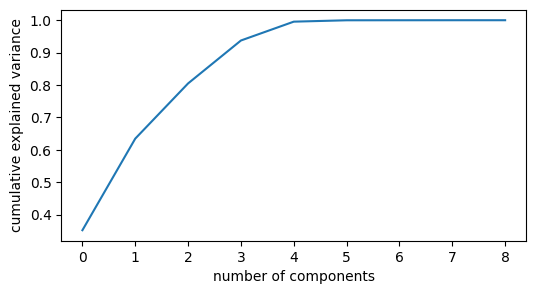

In [ ]:
estimate_n_component(scaled_data)

In [ ]:
def transform(df):
  # make final dim reduction
  pca = PCA(n_components=4)
  
  features_df = df.drop("close",axis=1)
  y_train = df[['close']]
  pca.fit(features_df)

  features_reduced_df = pd.DataFrame(
      pca.transform(features_df),
      index=features_df.index,
      columns = ["feature1","feature2","feature3","feature4"]
  )
  features_reduced_df["close"] = df["close"]
  return features_reduced_df

In [ ]:
reduced_df = transform(scaled_data) 
reduced_df

,feature1,feature2,feature3,feature4,close
0,-0.443089,0.205990,0.167410,0.039447,0.004144
1,-0.444422,0.207438,0.001045,0.074094,0.003655
2,-0.445950,0.208832,-0.165321,0.108740,0.003216
3,-0.446723,0.210432,-0.331687,0.143389,0.003425
4,-0.447421,0.212052,-0.498053,0.178039,0.003275
...,...,...,...,...,...
3121,0.520298,-0.225249,0.329999,-0.371495,0.415351
3122,0.524585,-0.222191,0.163550,-0.342050,0.415498
3123,0.519828,-0.221790,-0.002707,-0.300216,0.413512
3124,0.516061,-0.220905,-0.169165,-0.271072,0.411757


In [ ]:
train,test,valid = split_data(reduced_df)
len(train),len(test),len(valid)

(2344, 468, 314)

In [ ]:
def create_sequences(input_data,sequence_len): 
  seqs = []
  for i in tqdm(range(len(input_data)-sequence_len)):
    seq = input_data[i:i+sequence_len] # sequencing data
    label_position= i+sequence_len # keep track of current position
    label= input_data.iloc[label_position]["close"]
    seqs.append((seq,label))
  return seqs

In [ ]:
train_sequences = create_sequences(train,sequence_len=200)
test_sequences = create_sequences(test,sequence_len=200)
valid_sequences = create_sequences(valid,sequence_len=200)

  0%|          | 0/2144 [00:00<?, ?it/s]

  0%|          | 0/268 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

In [ ]:
len(train_sequences),len(test_sequences),len(valid_sequences)

(2144, 268, 114)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class btcDataset(Dataset):
  def __init__(self,sequences): 
    self.sequences = sequences

  def __len__(self):
    return len(self.sequences)

  def __getitem__(self,idx):
    sequence,label = self.sequences[idx]
    return dict(
        sequence=torch.Tensor(sequence.to_numpy()),
        label=torch.tensor(label).float()
    )

In [ ]:
train_dataset = btcDataset(train_sequences)
test_dataset = btcDataset(test_sequences)
valid_dataset = btcDataset(valid_sequences)

In [ ]:
# input dimensions
input_dim,n_features = train_dataset[0]['sequence'].shape  
input_dim,n_features

(200, 5)

 # Training LSTM Model

In [ ]:
%%capture
!pip install optuna

In [ ]:
if torch.cuda.is_available():
    DEVICE = torch.device("cuda:0")
else:
    DEVICE = torch.device("cpu")
BATCH_SIZE = 32
EPOCHS = 20
criterion = torch.nn.MSELoss()
print(DEVICE)

cuda:0


#### early stopping from torchtools

In [ ]:
from pytorchtools import EarlyStopping

In [ ]:
import torch
import optuna
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from optuna.trial import TrialState

In [ ]:
class CustomModel(nn.Sequential):
    def __init__(self, n_layers, n_hidden, input_dim, dropout_ps):
        super(CustomModel, self).__init__()
        self.n_layers = n_layers
        self.n_hidden = n_hidden
        self.input_dim = input_dim
        self.dropout_ps = dropout_ps

        for i in range(n_layers):
            self.add_module(
                "lstm{}".format(i),
                nn.LSTM(self.input_dim, self.n_hidden, self.n_layers, batch_first=True),
            )
            self.add_module("dropout{}".format(i), nn.Dropout(self.dropout_ps[i]))

        self.add_module("linear", nn.Linear(self.n_hidden, out_features=1))

    def forward(self, x):
        h0 = torch.zeros(self.n_layers, x.size(1), self.n_hidden).requires_grad_().to(DEVICE)
        c0 = torch.zeros(self.n_layers, x.size(1), self.n_hidden).requires_grad_().to(DEVICE)
        x = torch.permute(
            x, (1,0,2)
        )  # permute the input to match The desired ordering of dimensions for lstm layer
        for module in self._modules.values():
            if isinstance(module, nn.LSTM):
                out = module(x, (h0, c0))[0]
        out = out[:, -1, :]
        out = self._modules["linear"](out)
        return out

In [ ]:
import torch.optim as optim
import optuna
from optuna.trial import TrialState

class Objective : 
  def __init__(self,trial=None):
    self.trial = trial
  
  def get_data(self):
    train = DataLoader(train_dataset,batch_size = BATCH_SIZE)
    test = DataLoader(test_dataset,batch_size = BATCH_SIZE)
    return train,test

  def define_model(self,trial):
    # We optimize the number of layers, hidden units and dropout ratio in each layer.
    n_layers = trial.suggest_int("n_layers", 1, 15)
    n_hidden = trial.suggest_int("n_hidden", 1, 50)
    dropout_ps = [trial.suggest_float("dropout_l{}".format(i), 0.2, 0.5) for i in range(n_layers)]
    input_dim=5
    
    return CustomModel(n_layers, n_hidden, input_dim,dropout_ps)

  def objective(self,trial):
    # Generate the model
    model = self.define_model(trial).to(DEVICE)
    # Generate the optimizers.
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
    lr = trial.suggest_float("lr", 1e-8, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)
    train_loader, test_loader = self.get_data()
    early_stopping = EarlyStopping(patience=10, verbose=True)

    for epoch in tqdm(range(EPOCHS)):
      model.train()
      train_loss = 0.0
      for train_batch in train_loader :
          
          data = train_batch['sequence'].to(DEVICE) # 32, 200, 5
          optimizer.zero_grad()                     
          output = model.forward(data)
          loss = criterion(output, train_batch['label'].to(DEVICE))
          loss.backward()
          optimizer.step()
          train_loss += loss.item()

      test_loss = 0.0
      with torch.no_grad():
        for test_batch in train_loader :
            data = test_batch['sequence'].to(DEVICE)

            output = model.forward(data)
            loss = criterion(output, test_batch['label'].to(DEVICE))
            test_loss += loss.item()

      train_loss = train_loss / len(train_loader)
      test_loss = test_loss / len(test_loader)
      
      trial.report(test_loss, epoch)
      early_stopping(test_loss, model)

      if early_stopping.early_stop:
          print("Early stopping")
          break
      #Handle pruning based on the intermediate value.
      if trial.should_prune():
        raise optuna.exceptions.TrialPruned()

    return test_loss

In [ ]:
Optune = Objective()
study = optuna.create_study(direction="minimize")
study.optimize(Optune.objective, n_trials=20, timeout=600)

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-04-13 14:28:42,392] A new study created in memory with name: no-name-5a7aeb16-5694-47a5-be24-00dc93bbb7cf


  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([200, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Validation loss decreased (inf --> 0.131326).  Saving model ...
Validation loss decreased (0.131326 --> 0.131317).  Saving model ...
Validation loss decreased (0.131317 --> 0.131307).  Saving model ...
Validation loss decreased (0.131307 --> 0.131298).  Saving model ...
Validation loss decreased (0.131298 --> 0.131289).  Saving model ...
Validation loss decreased (0.131289 --> 0.131280).  Saving model ...
Validation loss decreased (0.131280 --> 0.131271).  Saving model ...
Validation loss decreased (0.131271 --> 0.131261).  Saving model ...
Validation loss decreased (0.131261 --> 0.131252).  Saving model ...
Validation loss decreased (0.131252 --> 0.131243).  Saving model ...
Validation loss decreased (0.131243 --> 0.131234).  Saving model ...
Validation loss decreased (0.131234 --> 0.131224).  Saving model ...
Validation loss decreased (0.131224 --> 0.131215).  Saving model ...
Validation loss decreased (0.131215 --> 0.131206).  Saving model ...
Validation loss decreased (0.131206 -->

[I 2023-04-13 14:28:58,154] Trial 0 finished with value: 0.1311508215238367 and parameters: {'n_layers': 8, 'n_hidden': 16, 'dropout_l0': 0.3515336893411142, 'dropout_l1': 0.4264489475976712, 'dropout_l2': 0.3177436831797609, 'dropout_l3': 0.33576015622796235, 'dropout_l4': 0.23642568188737054, 'dropout_l5': 0.3385219375227605, 'dropout_l6': 0.2078559970478598, 'dropout_l7': 0.4257867819886259, 'optimizer': 'SGD', 'lr': 4.797468306600811e-07}. Best is trial 0 with value: 0.1311508215238367.


Validation loss decreased (0.131160 --> 0.131151).  Saving model ...


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss decreased (inf --> 0.187181).  Saving model ...
Validation loss decreased (0.187181 --> 0.168061).  Saving model ...
Validation loss decreased (0.168061 --> 0.119244).  Saving model ...
Validation loss decreased (0.119244 --> 0.112664).  Saving model ...
Validation loss decreased (0.112664 --> 0.112556).  Saving model ...
Validation loss decreased (0.112556 --> 0.112483).  Saving model ...
Validation loss decreased (0.112483 --> 0.112425).  Saving model ...
Validation loss decreased (0.112425 --> 0.112381).  Saving model ...
Validation loss decreased (0.112381 --> 0.112346).  Saving model ...
Validation loss decreased (0.112346 --> 0.112318).  Saving model ...
Validation loss decreased (0.112318 --> 0.112296).  Saving model ...
Validation loss decreased (0.112296 --> 0.112277).  Saving model ...
Validation loss decreased (0.112277 --> 0.112261).  Saving model ...
Validation loss decreased (0.112261 --> 0.112247).  Saving model ...
Validation loss decreased (0.112247 -->

[I 2023-04-13 14:29:25,461] Trial 1 finished with value: 0.11219555699992473 and parameters: {'n_layers': 12, 'n_hidden': 13, 'dropout_l0': 0.482830288747798, 'dropout_l1': 0.3581693044703219, 'dropout_l2': 0.24309036195184686, 'dropout_l3': 0.4228988212872564, 'dropout_l4': 0.3307379197025561, 'dropout_l5': 0.2809986001152338, 'dropout_l6': 0.3509833545072204, 'dropout_l7': 0.27248536848200683, 'dropout_l8': 0.46780748671475153, 'dropout_l9': 0.49645984373463986, 'dropout_l10': 0.3749789495880895, 'dropout_l11': 0.4424008178043273, 'optimizer': 'Adam', 'lr': 0.02121697947693722}. Best is trial 1 with value: 0.11219555699992473.


Validation loss decreased (0.112202 --> 0.112196).  Saving model ...


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss decreased (inf --> 0.086222).  Saving model ...
Validation loss decreased (0.086222 --> 0.085400).  Saving model ...
Validation loss decreased (0.085400 --> 0.084651).  Saving model ...
Validation loss decreased (0.084651 --> 0.083948).  Saving model ...
Validation loss decreased (0.083948 --> 0.083282).  Saving model ...
Validation loss decreased (0.083282 --> 0.082647).  Saving model ...
Validation loss decreased (0.082647 --> 0.082040).  Saving model ...
Validation loss decreased (0.082040 --> 0.081459).  Saving model ...
Validation loss decreased (0.081459 --> 0.080902).  Saving model ...
Validation loss decreased (0.080902 --> 0.080368).  Saving model ...
Validation loss decreased (0.080368 --> 0.079855).  Saving model ...
Validation loss decreased (0.079855 --> 0.079361).  Saving model ...
Validation loss decreased (0.079361 --> 0.078887).  Saving model ...
Validation loss decreased (0.078887 --> 0.078430).  Saving model ...
Validation loss decreased (0.078430 -->

[I 2023-04-13 14:29:32,804] Trial 2 finished with value: 0.07601294685446192 and parameters: {'n_layers': 1, 'n_hidden': 34, 'dropout_l0': 0.4176311059019472, 'optimizer': 'Adam', 'lr': 3.879068445848574e-06}. Best is trial 2 with value: 0.07601294685446192.


Validation loss decreased (0.076381 --> 0.076013).  Saving model ...


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss decreased (inf --> 0.166794).  Saving model ...
Validation loss decreased (0.166794 --> 0.158274).  Saving model ...
Validation loss decreased (0.158274 --> 0.150648).  Saving model ...
Validation loss decreased (0.150648 --> 0.143621).  Saving model ...
Validation loss decreased (0.143621 --> 0.137082).  Saving model ...
Validation loss decreased (0.137082 --> 0.130970).  Saving model ...
Validation loss decreased (0.130970 --> 0.125250).  Saving model ...
Validation loss decreased (0.125250 --> 0.119903).  Saving model ...
Validation loss decreased (0.119903 --> 0.114917).  Saving model ...
Validation loss decreased (0.114917 --> 0.110285).  Saving model ...
Validation loss decreased (0.110285 --> 0.106001).  Saving model ...
Validation loss decreased (0.106001 --> 0.102058).  Saving model ...
Validation loss decreased (0.102058 --> 0.098451).  Saving model ...
Validation loss decreased (0.098451 --> 0.095172).  Saving model ...
Validation loss decreased (0.095172 -->

[I 2023-04-13 14:30:35,616] Trial 3 finished with value: 0.08167918248273054 and parameters: {'n_layers': 10, 'n_hidden': 43, 'dropout_l0': 0.2239261833336137, 'dropout_l1': 0.4597455543424737, 'dropout_l2': 0.3692187593923704, 'dropout_l3': 0.31629875140943803, 'dropout_l4': 0.40319081085191777, 'dropout_l5': 0.2512691051466843, 'dropout_l6': 0.37384647692070183, 'dropout_l7': 0.2900987181904885, 'dropout_l8': 0.32124321706010855, 'dropout_l9': 0.41245713709262755, 'optimizer': 'Adam', 'lr': 4.542907367629652e-06}. Best is trial 2 with value: 0.07601294685446192.


Validation loss decreased (0.083271 --> 0.081679).  Saving model ...


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss decreased (inf --> 0.400653).  Saving model ...
Validation loss decreased (0.400653 --> 0.399655).  Saving model ...
Validation loss decreased (0.399655 --> 0.398686).  Saving model ...
Validation loss decreased (0.398686 --> 0.397731).  Saving model ...
Validation loss decreased (0.397731 --> 0.396784).  Saving model ...
Validation loss decreased (0.396784 --> 0.395841).  Saving model ...
Validation loss decreased (0.395841 --> 0.394903).  Saving model ...
Validation loss decreased (0.394903 --> 0.393969).  Saving model ...
Validation loss decreased (0.393969 --> 0.393037).  Saving model ...
Validation loss decreased (0.393037 --> 0.392108).  Saving model ...
Validation loss decreased (0.392108 --> 0.391181).  Saving model ...
Validation loss decreased (0.391181 --> 0.390257).  Saving model ...
Validation loss decreased (0.390257 --> 0.389335).  Saving model ...
Validation loss decreased (0.389335 --> 0.388414).  Saving model ...
Validation loss decreased (0.388414 -->

[I 2023-04-13 14:31:02,080] Trial 4 finished with value: 0.3829276783184873 and parameters: {'n_layers': 12, 'n_hidden': 11, 'dropout_l0': 0.4917746001375064, 'dropout_l1': 0.4168364722220953, 'dropout_l2': 0.22683163890998678, 'dropout_l3': 0.38642819057768174, 'dropout_l4': 0.4542449845943912, 'dropout_l5': 0.3130971250792955, 'dropout_l6': 0.4176950694768299, 'dropout_l7': 0.3169184408624688, 'dropout_l8': 0.47495549973946805, 'dropout_l9': 0.36993627202711443, 'dropout_l10': 0.3050342995028814, 'dropout_l11': 0.38335140032704684, 'optimizer': 'Adam', 'lr': 7.826551448048968e-07}. Best is trial 2 with value: 0.07601294685446192.


Validation loss decreased (0.383838 --> 0.382928).  Saving model ...


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-04-13 14:31:02,696] Trial 5 pruned. 


Validation loss decreased (inf --> 0.372760).  Saving model ...


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-04-13 14:31:07,057] Trial 6 pruned. 


Validation loss decreased (inf --> 0.240323).  Saving model ...


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss decreased (inf --> 0.152247).  Saving model ...
Validation loss decreased (0.152247 --> 0.132879).  Saving model ...
Validation loss decreased (0.132879 --> 0.117493).  Saving model ...
Validation loss decreased (0.117493 --> 0.105021).  Saving model ...
Validation loss decreased (0.105021 --> 0.095076).  Saving model ...
Validation loss decreased (0.095076 --> 0.087473).  Saving model ...
Validation loss decreased (0.087473 --> 0.082011).  Saving model ...
Validation loss decreased (0.082011 --> 0.078370).  Saving model ...
Validation loss decreased (0.078370 --> 0.076121).  Saving model ...
Validation loss decreased (0.076121 --> 0.074826).  Saving model ...
Validation loss decreased (0.074826 --> 0.074121).  Saving model ...
Validation loss decreased (0.074121 --> 0.073754).  Saving model ...
Validation loss decreased (0.073754 --> 0.073568).  Saving model ...
Validation loss decreased (0.073568 --> 0.073478).  Saving model ...
Validation loss decreased (0.073478 -->

[I 2023-04-13 14:31:29,885] Trial 7 finished with value: 0.07340201214335845 and parameters: {'n_layers': 9, 'n_hidden': 24, 'dropout_l0': 0.2092496745253871, 'dropout_l1': 0.22451770605641885, 'dropout_l2': 0.42104900468926976, 'dropout_l3': 0.22406995697205384, 'dropout_l4': 0.3932797622579044, 'dropout_l5': 0.26887540211146144, 'dropout_l6': 0.29870351084912017, 'dropout_l7': 0.27122395364586144, 'dropout_l8': 0.28569496489203516, 'optimizer': 'Adam', 'lr': 2.3396884370521484e-05}. Best is trial 7 with value: 0.07340201214335845.


Validation loss decreased (0.073402 --> 0.073402).  Saving model ...


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss decreased (inf --> 0.144737).  Saving model ...
Validation loss decreased (0.144737 --> 0.143737).  Saving model ...


[I 2023-04-13 14:31:41,383] Trial 8 pruned. 


Validation loss decreased (0.143737 --> 0.142875).  Saving model ...


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-04-13 14:31:41,890] Trial 9 pruned. 


Validation loss decreased (inf --> 0.700619).  Saving model ...


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-04-13 14:31:43,334] Trial 10 pruned. 


Validation loss decreased (inf --> 0.322380).  Saving model ...


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-04-13 14:31:43,935] Trial 11 pruned. 


Validation loss decreased (inf --> 0.325185).  Saving model ...


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss decreased (inf --> 0.141003).  Saving model ...
Validation loss decreased (0.141003 --> 0.077304).  Saving model ...
Validation loss decreased (0.077304 --> 0.066100).  Saving model ...
Validation loss decreased (0.066100 --> 0.056151).  Saving model ...
Validation loss decreased (0.056151 --> 0.045830).  Saving model ...
Validation loss decreased (0.045830 --> 0.035909).  Saving model ...
Validation loss decreased (0.035909 --> 0.032288).  Saving model ...
Validation loss decreased (0.032288 --> 0.030783).  Saving model ...
Validation loss decreased (0.030783 --> 0.030046).  Saving model ...
Validation loss decreased (0.030046 --> 0.029683).  Saving model ...
Validation loss decreased (0.029683 --> 0.029528).  Saving model ...
Validation loss decreased (0.029528 --> 0.029485).  Saving model ...
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStopping counter: 5 out of 10
Ea

[I 2023-04-13 14:31:51,557] Trial 12 finished with value: 0.029871193792132544 and parameters: {'n_layers': 1, 'n_hidden': 27, 'dropout_l0': 0.39927013555362234, 'optimizer': 'Adam', 'lr': 0.00062696963837699}. Best is trial 12 with value: 0.029871193792132544.


EarlyStopping counter: 8 out of 10


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss decreased (inf --> 0.095640).  Saving model ...
Validation loss decreased (0.095640 --> 0.084297).  Saving model ...
Validation loss decreased (0.084297 --> 0.078625).  Saving model ...
Validation loss decreased (0.078625 --> 0.077149).  Saving model ...
Validation loss decreased (0.077149 --> 0.076388).  Saving model ...
Validation loss decreased (0.076388 --> 0.075691).  Saving model ...
Validation loss decreased (0.075691 --> 0.075254).  Saving model ...
Validation loss decreased (0.075254 --> 0.074981).  Saving model ...
Validation loss decreased (0.074981 --> 0.074790).  Saving model ...
Validation loss decreased (0.074790 --> 0.074432).  Saving model ...
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
Validation loss decreased (0.074432 --> 0.074271).  Saving model ...
Validation loss decreased (0.074271 --> 0.074158).  Saving model ...
Validation loss decreased (0.074158 --> 0.074081).  Saving model ...
Val

[I 2023-04-13 14:32:10,184] Trial 13 finished with value: 0.0739343897927635 and parameters: {'n_layers': 7, 'n_hidden': 28, 'dropout_l0': 0.28259051685519415, 'dropout_l1': 0.20020762783347804, 'dropout_l2': 0.49880275761383364, 'dropout_l3': 0.20173107702525547, 'dropout_l4': 0.4812332768485391, 'dropout_l5': 0.49467257392832864, 'dropout_l6': 0.278086453698104, 'optimizer': 'Adam', 'lr': 0.0007824335277981899}. Best is trial 12 with value: 0.029871193792132544.


Validation loss decreased (0.073959 --> 0.073934).  Saving model ...


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-04-13 14:32:10,837] Trial 14 pruned. 


Validation loss decreased (inf --> 0.240308).  Saving model ...


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-04-13 14:32:11,240] Trial 15 pruned. 


Validation loss decreased (inf --> 1.790628).  Saving model ...


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss decreased (inf --> 0.073417).  Saving model ...
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStopping counter: 5 out of 10
EarlyStopping counter: 6 out of 10
EarlyStopping counter: 7 out of 10
EarlyStopping counter: 8 out of 10
EarlyStopping counter: 9 out of 10


[I 2023-04-13 14:32:25,117] Trial 16 finished with value: 0.07356431756372533 and parameters: {'n_layers': 9, 'n_hidden': 25, 'dropout_l0': 0.20041331533095877, 'dropout_l1': 0.2799249939767063, 'dropout_l2': 0.40139383625714525, 'dropout_l3': 0.3703807440407796, 'dropout_l4': 0.4997956861809647, 'dropout_l5': 0.36264527855124473, 'dropout_l6': 0.29894905110938214, 'dropout_l7': 0.49958456576816435, 'dropout_l8': 0.24602338385369915, 'optimizer': 'Adam', 'lr': 9.422121668936588e-05}. Best is trial 12 with value: 0.029871193792132544.


EarlyStopping counter: 10 out of 10
Early stopping


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-04-13 14:32:30,845] Trial 17 pruned. 


Validation loss decreased (inf --> 0.621423).  Saving model ...


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-04-13 14:32:31,826] Trial 18 pruned. 


Validation loss decreased (inf --> 1.323242).  Saving model ...


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-04-13 14:32:32,498] Trial 19 pruned. 


Validation loss decreased (inf --> 1.438516).  Saving model ...
Study statistics: 
  Number of finished trials:  20
  Number of pruned trials:  11
  Number of complete trials:  9
Best trial:
  Value:  0.029871193792132544
  Params: 
    n_layers: 1
    n_hidden: 27
    dropout_l0: 0.39927013555362234
    optimizer: Adam
    lr: 0.00062696963837699


In [ ]:
class LstmConfig :
  layer_dim = 1
  hidden_dim = 27
  dropout_l0= 0.39927013555362234
  lr= 0.00062696963837699
  optimizer_name="Adam"
lstmConfig = LstmConfig() 

In [ ]:
import torch.nn as nn 

class LSTM_model(nn.Module):
  def __init__(self,input_dim,hidden_dim=lstmConfig.hidden_dim,layer_dim=lstmConfig.layer_dim,output_dim=1):

    super(LSTM_model,self).__init__()
    self.hidden_dim=hidden_dim
    self.layer_dim = layer_dim 
    self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
    self.dropout = nn.Dropout(lstmConfig.dropout_l0)
    self.fc = nn.Linear(hidden_dim, output_dim)
  
  def forward(self, x):
    # Initialize the hidden state and cell state
    h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
    c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
    # Pass the inputs through the LSTM
    out, (hn, cn) = self.lstm(x, (h0, c0))
    out = self.dropout(out)
    # Compute the output
    out = self.fc(out[:, -1, :])
    # Return the output and final hidden and cell state
    return out

In [ ]:
class btcForcaster():
  def __init__(self,model,criterion,optimizer): 
    self.model = model
    self.criterion = criterion
    self.optimizer = optimizer

  def update_weights(self,train_batch):
    self.optimizer.zero_grad()
    outputs = self.model.forward(train_batch["sequence"]) 
    loss = self.criterion(outputs,train_batch["label"])
    loss.backward()
    self.optimizer.step()
    return loss,outputs
  
  def model_testing(self,test_batch): 

    outputs = self.model.forward(test_batch["sequence"])
    loss = self.criterion(outputs, test_batch["label"])
    return loss,outputs

  def train_test(self,model_name,train_data,test_data):
    
    self.model.train()
    train_losses=[]
    test_losses=[]
    early_stopping = EarlyStopping(patience=10, verbose=True)

    for epoch in tqdm(range(EPOCHS)):
      train_loss = 0.0
      train_acc = 0.0

      for train_batch in train_data:
          loss,out = self.update_weights(train_batch)
          train_loss += loss.item()

      test_loss = 0.0
      test_acc = 0.0
      with torch.no_grad():
        for test_batch in test_data:
          loss,out = self.model_testing(test_batch)
          test_loss += loss.item()

      train_loss = train_loss / len(train_data)
      test_loss = test_loss / len(test_data)
      # early stopping callback
      early_stopping(train_loss, self.model)
      if early_stopping.early_stop:
        print("Break in Epoch:", epoch)
        break

      train_losses.append(train_loss)
      test_losses.append(test_loss)
      print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

    torch.save(self.model.state_dict(),model_name+'.pt')
    plt.figure(figsize=(8,4))
    sns.set_style("darkgrid")
    plt.plot(train_losses, label="Train Loss")
    plt.plot(test_losses, label="Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [ ]:
train_dataloader = DataLoader(train_dataset,BATCH_SIZE)
test_dataloader = DataLoader(test_dataset,BATCH_SIZE)
valid_dataloader = DataLoader(valid_dataset,BATCH_SIZE)

In [ ]:
lstm_model = LSTM_model(n_features)

In [ ]:
optimizer = optim.Adam(lstm_model.parameters(), lr = lstmConfig.lr)

  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Validation loss decreased (inf --> 0.007640).  Saving model ...
Epoch 1/20, Train Loss: 0.0076, Test Loss: 0.2383
EarlyStopping counter: 1 out of 10
Epoch 2/20, Train Loss: 0.0102, Test Loss: 0.1886
Validation loss decreased (0.007640 --> 0.006813).  Saving model ...
Epoch 3/20, Train Loss: 0.0068, Test Loss: 0.1264
Validation loss decreased (0.006813 --> 0.004568).  Saving model ...
Epoch 4/20, Train Loss: 0.0046, Test Loss: 0.0539
Validation loss decreased (0.004568 --> 0.002597).  Saving model ...
Epoch 5/20, Train Loss: 0.0026, Test Loss: 0.0185
Validation loss decreased (0.002597 --> 0.001886).  Saving model ...
Epoch 6/20, Train Loss: 0.0019, Test Loss: 0.0186
Validation loss decreased (0.001886 --> 0.001638).  Saving model ...
Epoch 7/20, Train Loss: 0.0016, Test Loss: 0.0201
EarlyStopping counter: 1 out of 10
Epoch 8/20, Train Loss: 0.0017, Test Loss: 0.0173
Validation loss decreased (0.001638 --> 0.001445).  Saving model ...
Epoch 9/20, Train Loss: 0.0014, Test Loss: 0.0156
Va

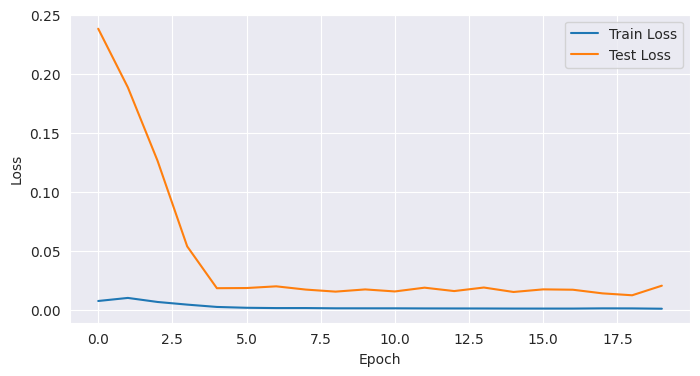

In [ ]:
Trainer = btcForcaster(lstm_model,criterion,optimizer)
Trainer.train_test('lstm_model',train_dataloader,test_dataloader)

# Explore lstm predictions 

In [ ]:
import torch
state_dict = torch.load("lstm_model.pt")

In [ ]:
loaded_model = LSTM_model(n_features)
print(loaded_model.load_state_dict(state_dict))
loaded_model.eval()

<All keys matched successfully>


LSTM_model(
  (lstm): LSTM(5, 27, batch_first=True)
  (dropout): Dropout(p=0.39927013555362234, inplace=False)
  (fc): Linear(in_features=27, out_features=1, bias=True)
)

In [ ]:
def model_evaluation(model,input_data):
  predictions_seq=[]
  with torch.no_grad():
    for batch in input_data :
        predictions = model(batch["sequence"])
        pred = torch.flatten(predictions)
        predictions=pred.numpy()
        predictions_seq.append(predictions)
  return predictions_seq

In [ ]:
def predictions_preprocess(list_predictions,input_data):
  predictions = pd.Series(data=np.concatenate(list_predictions))
  predictions_df = pd.DataFrame(data={'predicted_close':predictions})

  data_target = input_data['close']
  data_target=data_target[200:].reset_index() # predictions start after the first sequence
  data_target.drop(["index"],axis=1,inplace=True)
  return predictions_df,data_target

In [ ]:
import seaborn as sns
def explore_predictions(predict,test_targets):
    plt.figure(figsize=(7,5))
    sns.set_style("darkgrid")
    # Plot the predictions against the actual values
    plt.plot(test_targets, label='actual')
    plt.plot(predict, label='prediction',color="red")
    plt.legend()
    plt.show()

In [ ]:
def descale_transform(predictions_df,target_df,scaler):
  descaler = MinMaxScaler()
  descaler.min_, descaler.scale_ = scaler.min_[-1], scaler.scale_[-1] #get the corresponding values for close (last feature)
  
  descaled_predictions_df = pd.DataFrame(
      descaler.inverse_transform(predictions_df),
      index=predictions_df.index,
      columns = predictions_df.columns
  )
  descaled_target_df = pd.DataFrame(
      descaler.inverse_transform(target_df),
      index=target_df.index,
      columns = target_df.columns
  )
  return descaled_predictions_df, descaled_target_df

In [ ]:
# descale train_target and prediction target based on the scaler used 
Scaler, Scaler.min_ , Scaler.scale_ # these are unscaled minimum and scaling values for each feature

(MinMaxScaler(),
 array([-0.03333333,  0.        , -0.01923077, -0.09090909, -0.00262564,
        -0.00308745, -0.00259037, -0.00264292, -0.04943389, -0.00264292]),
 array([3.33333333e-02, 1.66666667e-01, 1.92307692e-02, 9.09090909e-02,
        1.48427770e-05, 1.45819584e-05, 1.51033327e-05, 1.48392776e-05,
        1.05189924e-02, 1.48392776e-05]))

In [ ]:
def reformat_data(pred,target,data_origin): # reformat data for plotting 
  data_origin.reset_index(inplace=True)
  data_origin = data_origin.drop('Date',axis=1)
  pred_descaled, target_descaled = descale_transform(pred,target,Scaler)

  pred_descaled['dates'] = data_origin['dates_features']
  target_descaled['dates'] = data_origin['dates_features']
  pred_descaled['dates'] = pd.to_datetime(pred_descaled['dates'])
  target_descaled['dates'] = pd.to_datetime(target_descaled['dates'])
  target_descaled.set_index('dates',inplace=True)
  pred_descaled.set_index('dates',inplace=True)

  return pred_descaled,target_descaled

In [ ]:
predictions_on_train = model_evaluation(loaded_model,train_dataloader)
predictions_train,train_target = predictions_preprocess(predictions_on_train,train)

In [ ]:
predictions_train,train_target = reformat_data(predictions_train,train_target,training_data)

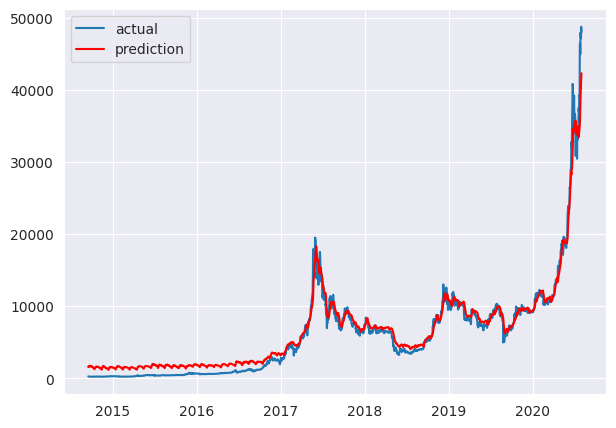

In [ ]:
explore_predictions(predictions_train,train_target)

In [ ]:
predictions_on_test = model_evaluation(loaded_model,test_dataloader)
predictions_test,test_target = predictions_preprocess(predictions_on_test,test)

In [ ]:
predictions_test,test_target = reformat_data(predictions_test,test_target,testing_data)

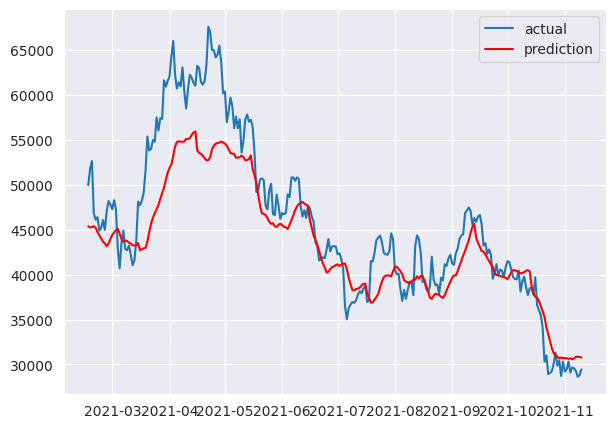

In [ ]:
# predictions on testing data
explore_predictions(predictions_test,test_target)

In [ ]:
predictions_on_valid = model_evaluation(loaded_model,valid_dataloader)
predictions_valid,valid_target = predictions_preprocess(predictions_on_valid,valid)

In [ ]:
predictions_valid,valid_target = reformat_data(predictions_valid,valid_target,validation_data)

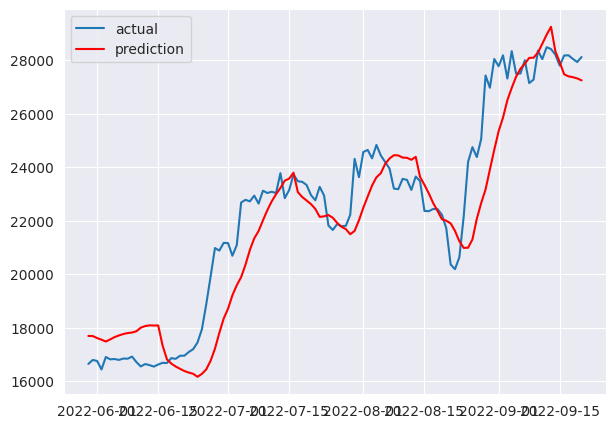

In [ ]:
# predictions on unseen data
explore_predictions(predictions_valid,valid_target)

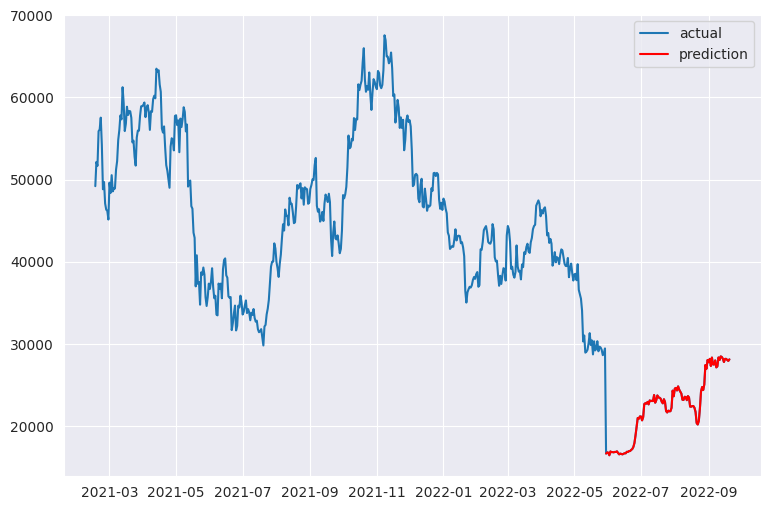

In [ ]:
def extrapolate1(actual1,pred): 
    plt.figure(figsize=(9,6))
    sns.set_style("darkgrid")
    # Plot the predictions against the actual values
    actual1 = actual1[['close']]
    #actual1.rename(columns={"Close":"close"},inplace=True)
    actual = pd.concat([actual1,pred])
    plt.plot(actual, label='actual')
    plt.plot(pred, label='prediction',color="red")
    plt.legend()
    plt.show()
extrapolate1(testing_data,valid_target)

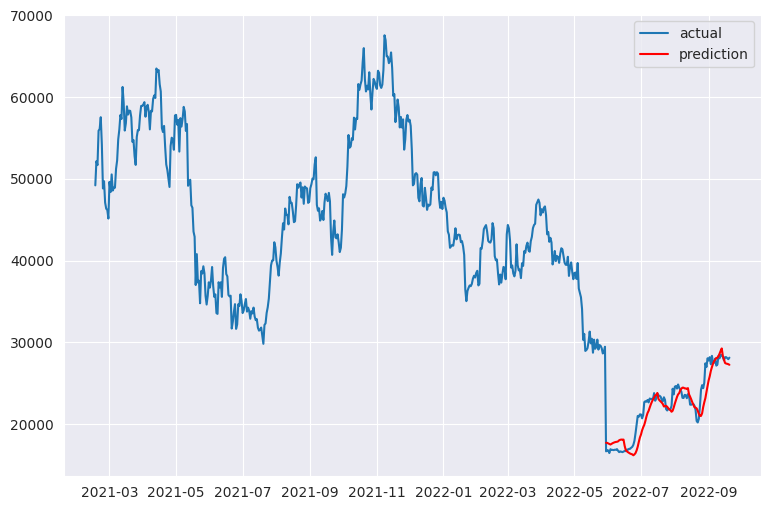

In [ ]:
def extrapolate(actual1,actual2,pred): 
    plt.figure(figsize=(9,6))
    sns.set_style("darkgrid")
    # Plot the predictions against the actual values
    actual1 = actual1[['close']]
    #actual1.rename(columns={"Close":"close"},inplace=True)
    actual = pd.concat([actual1,actual2])
    plt.plot(actual, label='actual')
    plt.plot(pred, label='prediction',color="red")
    plt.legend()
    plt.show()
extrapolate(testing_data,valid_target,predictions_valid)

# bitcoin predictions for the next 200 days 

In [ ]:
def model_evaluation()